# 1

## a

In [6]:
import numpy as np

# Write the Markov process in matrix representation 
matrix = np.array([[0.2, 0.7, 0.1],
                   [0.2, 0.5, 0.3],
                   [0.2, 0.4, 0.4]])

print(matrix)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


## b

In [7]:
# Initial state
current_state = 1  # X0 = 1

# Simulate chain
num_steps = 100  # Define the number of steps to simulate
chain_realization = [current_state]  # Store the chain realization

for _ in range(num_steps):
    # Use the transition probabilities to determine the next state
    probabilities = matrix[current_state]
    next_state = np.random.choice([0, 1, 2], p=probabilities)
    
    # Update current state
    current_state = next_state
    chain_realization.append(current_state)  # Store the state
    
chain_realization_plus_one = [state + 1 for state in chain_realization]
print("Chain realization:", chain_realization_plus_one)


Chain realization: [2, 3, 3, 2, 3, 3, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 3, 3, 1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 1, 3, 2, 3, 3, 2, 2]


# 2

## a

In [7]:
import numpy as np

# Define the transition matrix
matrix = np.array([[0.2, 0.7, 0.1],
                   [0.2, 0.5, 0.3],
                   [0.2, 0.4, 0.4]])

# Calculate the eigenvalues and eigenvectors of the transpose matrix
eigenvalues, eigenvectors = np.linalg.eig(matrix.T)

# Find the eigenvector corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]
stationary = np.real(eigenvectors[:, index])  # Taking the real part as the stationary distribution

# Normalize the stationary distribution
stationary = stationary / np.sum(stationary)
print("Stationary distribution:", stationary)


Stationary distribution: [0.2        0.51111111 0.28888889]


## b

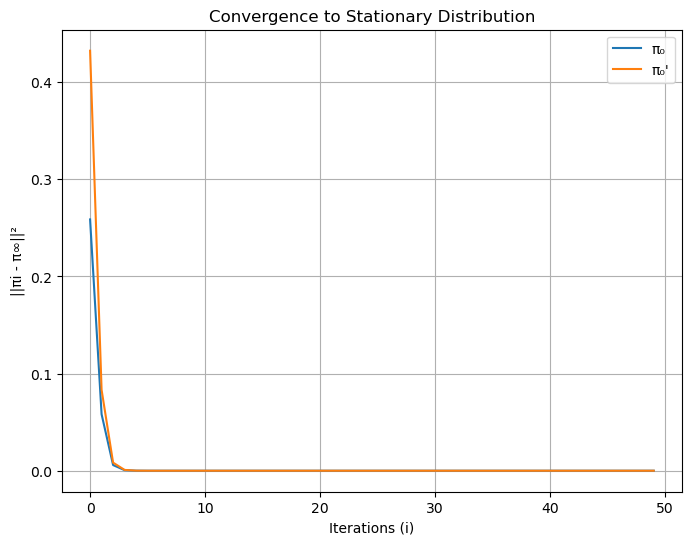

In [8]:
import matplotlib.pyplot as plt

# Define initial probability distributions π₀ and π₀'
pi_0 = np.array([0.1, 0.4, 0.5])  
pi_0_prime = np.array([0.5, 0.2, 0.3]) 

# Function to calculate the L2 norm between two vectors
def l2_norm(v1, v2):
    return np.linalg.norm(v1 - v2)

# Calculate the evolution of πᵢ over time until convergence
num_iterations = 50
result = []
result_prime = []

for i in range(num_iterations):
    pi_i = np.dot(pi_0, np.linalg.matrix_power(matrix, i))
    pi_i_prime = np.dot(pi_0_prime, np.linalg.matrix_power(matrix, i))
    result.append(l2_norm(pi_i, stationary))
    result_prime.append(l2_norm(pi_i_prime, stationary))

# Plotting i vs ∥πi − π∞∥² for both initial conditions
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), result, label='π₀')
plt.plot(range(num_iterations), result_prime, label='π₀\'')
plt.xlabel('Iterations (i)')
plt.ylabel('||πi - π∞||²')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.show()

# 3

## a

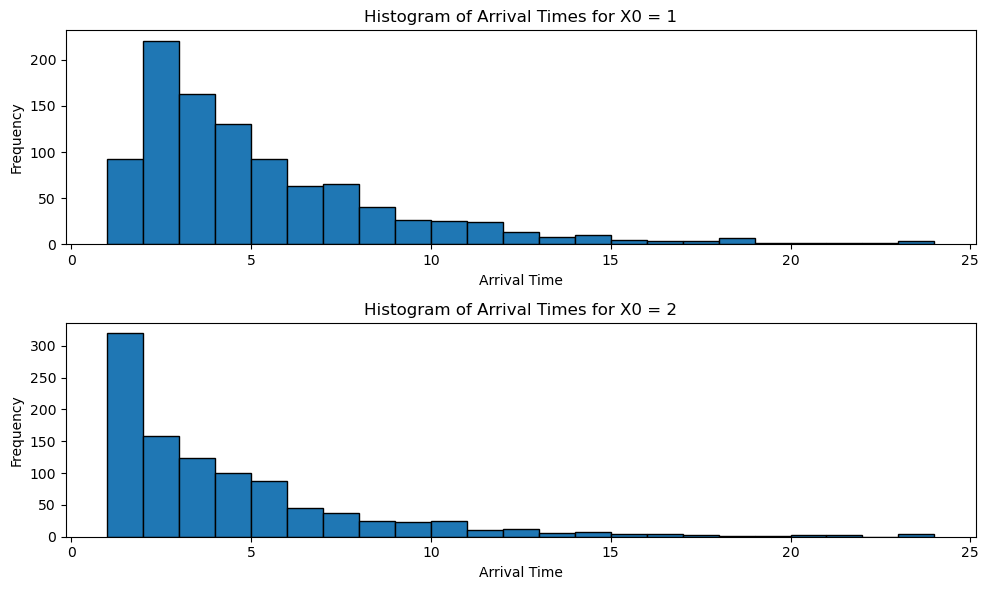

Mean arrival time for X0 = 1: 4.812
Mean arrival time for X0 = 2: 3.864


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_chain(start_state):
    transition_matrix = np.array([
        [0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0.2, 0.4, 0.4]
    ])
    
    current_state = start_state - 1  # Convert starting state to index (0-based)
    num_steps = 0

    while current_state != 2:  # Until Xi = 3 is reached
        probabilities = transition_matrix[current_state]
        next_state = np.random.choice([0, 1, 2], p=probabilities)
        current_state = next_state
        num_steps += 1

    return num_steps

# Simulate multiple runs for X0 = 1 and X0 = 2
num_simulations = 1000  # Number of simulations
arrival_times_X1 = [simulate_chain(1) for _ in range(num_simulations)]
arrival_times_X2 = [simulate_chain(2) for _ in range(num_simulations)]

# Plot histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(arrival_times_X1, bins=range(min(arrival_times_X1), max(arrival_times_X1) + 1), edgecolor='black')
plt.title('Histogram of Arrival Times for X0 = 1')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(arrival_times_X2, bins=range(min(arrival_times_X2), max(arrival_times_X2) + 1), edgecolor='black')
plt.title('Histogram of Arrival Times for X0 = 2')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute mean arrival times
mean_arrival_time_X1 = np.mean(arrival_times_X1)
mean_arrival_time_X2 = np.mean(arrival_times_X2)

print("Mean arrival time for X0 = 1:", mean_arrival_time_X1)
print("Mean arrival time for X0 = 2:", mean_arrival_time_X2)


## b

$$
\begin{aligned}
& \left\{\begin{array}{l}
\mu_2=1+p_{21} \mu_1+p_{22} \mu_2 \\
\mu_1=1+p_{11} \mu_1+p_{12} \mu_2
\end{array}\right. \\
& \left\{\begin{array}{l}
\mu_2=1+0.2 \mu_1+0.5 \mu_2 \\
\mu_1=1+0.1 \mu_1+0.7 \mu_2
\end{array}\right. \\
& \text { so } \mu_1=\frac{60}{13}=4.62 \\
& \mu_2=\frac{50}{13}=3.85
\end{aligned}
$$

The result is close to the result in part a

